In [1]:
def printMatrix(A, n):
    s = "".join( ("| ","|\n| ".join([("{:0.3f}\t"*n).format(*u) for u in A]), "|") )
#     print("---")
    print(s)
#     print("---")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

m = 5000 # num samples       / rows
n = 2 # num num vars (including bias) / cols


In [3]:
w_true = 100*np.random.randn(n)
print(w_true)
def trueFunction(A, w_true):
    z = np.matmul(A, w_true)
    c = 1/z
    return c

[-77.12117165  62.27248259]


In [4]:
# sample some data from the true distribution
A_true_uns = np.column_stack( (np.ones(m), np.random.randn(m, n-1)))

mu = np.mean(A_true_uns, axis=0)
sigma = np.std(A_true_uns, axis=0)

print(A_true_uns. shape, mu.shape, sigma.shape)

# A_true = (A_true_uns - mu) / (sigma+1e-4)
A_true = A_true_uns

y_true = trueFunction(A_true, w_true)


(5000, 2) (2,) (2,)


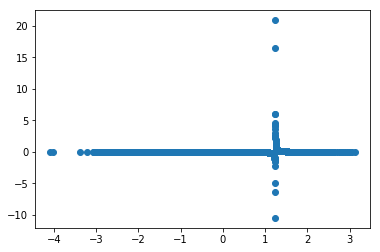

In [5]:
plt.plot(A_true[:, 1], y_true, 'o')

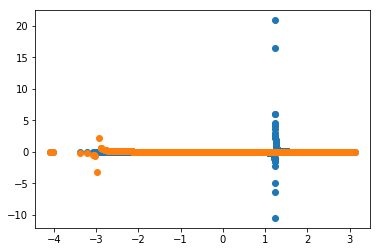

In [6]:
w = 100* np.random.randn(n)
z = np.matmul(A_true, w)


y_hat = 1/z

plt.plot(A_true[:, 1], y_true, 'o')
plt.plot(A_true[:, 1], y_hat, 'o')

In [7]:
def costGrad(w, A, y):
    Jarr = np.zeros(m)
    grad = np.zeros(n)
    for i in range(m):
        gradi = np.zeros(n)
        for j in range(n):
            x = A[i]
            z = np.matmul(x, w)
            a = 1/z

            Jarr[i] =  (y[i] - a)**2

            dJda = 2*(y[i] - a) 

            dadz = -1/(z**2)

            dzdwj = x[j]

            gradi[j] = dJda * dadz * dzdwj
            
    grad += gradi
    J = np.sum(Jarr)
    
    return J, grad

In [8]:
w = 100*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z

# w = np.random.randn(n)


def costGrad(A, w, y):
    z = np.matmul(A, w)
    a = 1/z
    J = np.sum((y-a)**2)
    
    dJda = 2*(a-y)
    dadz = -1/(z**2)
    dzdw = A.T
    
    grad = np.matmul(dzdw, dJda*dadz) # dJdw
    
    return J, grad



costGrad(A_true, w, y_true)

(3633.1091966753265, array([ 190367.15652752,  111926.89210212]))

In [9]:
def checkGradients(analytic, A, w, y):
    h = 1e-3
    
    gradn = np.zeros_like(w)
    for j in range(n):
        eps = np.zeros_like(w)
        eps[j] = h
        gradn[j] += (analytic(A, w+eps, y)[0] - analytic(A, w-eps, y)[0])
        
    gradn /= 2*h
    
    print("analytic\tnumeric")
    printMatrix(zip(analytic(A, w, y)[1], gradn), n)
            

In [10]:
checkGradients(costGrad, A_true, w, y_true)

analytic	numeric
| 190367.157	191130.331	|
| 111926.892	112081.673	|


w_true: [-77.12117165  62.27248259]
w_hat: [-32750.61797537  -8601.27842057]


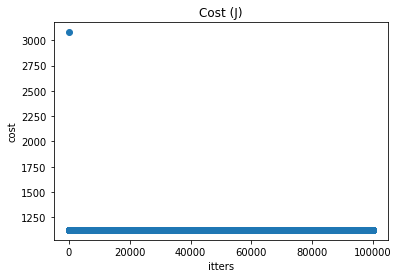

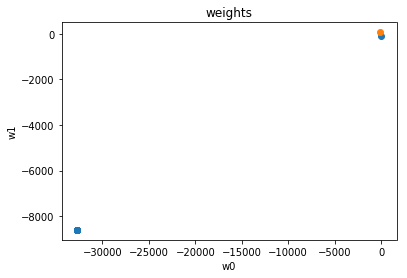

In [11]:
w = 100*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z
Jhist = []
whist = []
# Jhist = list(Jhist)
# whist = list(whist)

alpha = 1
for _ in range(100000):
    J, grad = costGrad(A_true, w, y_true)
    Jhist.append(J)
    whist.append(w)
    
    w = w - alpha*grad

plt.title("Cost (J)")
plt.plot(Jhist, 'o')
plt.xlabel("itters")
plt.ylabel("cost")

plt.figure()
plt.title("weights")
plt.xlabel("w0")
plt.ylabel("w1")
whist = np.array(whist)
plt.plot(whist[:, 0], whist[:, 1], 'o')

plt.plot(w_true[0], w_true[1], 'o')
plt.plot()
# print(whist)
# print(("{:.3}\n"*len(Jhist)).format(*Jhist))

print("w_true:",w_true)
print("w_hat:",w)

(1124.6424470084223, array([ -8.41225562e-08,   1.18738464e-07]))
1124.64244701
1124.64244683
1124.64244666
1124.64244649
1124.64244631
1124.64244614
1124.64244597
1124.64244579
1124.64244562
1124.64244545
1124.64244527
1124.6424451
1124.64244493
1124.64244475
1124.64244458
1124.6424444
1124.64244423
1124.64244406
1124.64244388
1124.64244371
1124.64244354
1124.64244336
1124.64244319
1124.64244301
1124.64244284
1124.64244267
1124.64244249
1124.64244232
1124.64244215
1124.64244197
1124.6424418
1124.64244162
1124.64244145
1124.64244128
1124.6424411
1124.64244093
1124.64244075
1124.64244058
1124.64244041
1124.64244023
1124.64244006
1124.64243988
1124.64243971
1124.64243953
1124.64243936
1124.64243919
1124.64243901
1124.64243884
1124.64243866
1124.64243849
1124.64243831
1124.64243814
1124.64243797
1124.64243779
1124.64243762
1124.64243744
1124.64243727
1124.64243709
1124.64243692
1124.64243675
1124.64243657
1124.6424364
1124.64243622
1124.64243605
1124.64243587
1124.6424357
1124.64243552
11

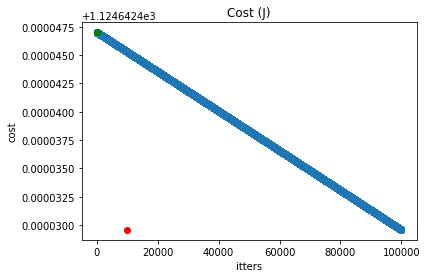

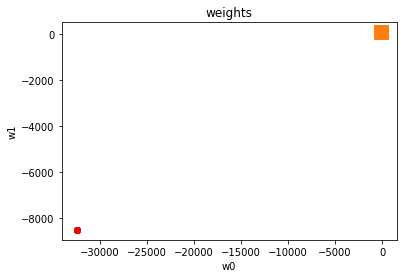

In [12]:
# w = w_true+10*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z
# w = np.random.randn(n)

Jhist = []
whist = []
Jhist = list(Jhist)
whist = list(whist)

alpha = 32e-1

v = np.zeros_like(w)
print(costGrad(A_true, w, y_true))
for q in range(100000):
    J, grad = costGrad(A_true, w, y_true)
    
    Jhist.append(J)
    whist.append(w)
    
#     v -= alpha*grad
#     w = w + 0.9*v
    w -= alpha*grad + w/1e7
    
    if(q%1000==0):
        print(J)

plt.title("Cost (J)")
plt.plot(Jhist, 'o')
plt.xlabel("itters")
plt.ylabel("cost")
plt.plot(0, Jhist[0], 'o', c='g')
plt.plot(10000,Jhist[-1], 'o', c='r')


plt.figure()
plt.title("weights")
plt.xlabel("w0")
plt.ylabel("w1")
whist = np.array(whist)

plt.plot(whist[:, 0], whist[:, 1], 'o')

plt.plot(w_true[0], w_true[1], 's', markersize=14)

plt.plot(whist[0, 0], whist[0, 1], 'o', c='g')
plt.plot(whist[-1, 0], whist[-1, 1], 'o', c='r')

# print(whist)
# print(("{:.3}\n"*len(Jhist)).format(*Jhist))

print(costGrad(A_true, w, y_true))
print("w_true:",w_true)
print("w_hat:",w)

w_true: [-77.12117165  62.27248259]
w_hat: [-32424.71681063  -8515.73245545]


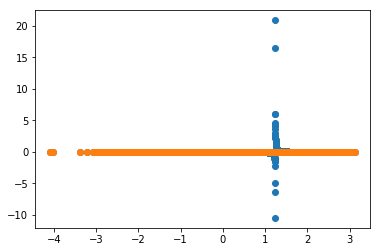

In [13]:
z = np.matmul(A_true, w)
y_hat = 1/z

plt.plot(A_true[:, 1], y_true, 'o')
plt.plot(A_true[:, 1], y_hat, 'o')

print("w_true:",w_true)
print("w_hat:",w)

## on to prob 3

In [14]:
m = 5  # num features
n = 10 # num examples

A = np.column_stack((np.ones(n), np.random.randn(n, m-1)))
P = (np.random.randn(m, m)) ** 2

y = np.random.randn(n) ** 2

print(A.shape, P.shape)

(10, 5) (5, 5)


In [15]:
def loss(A, P, y):
    z = np.zeros(n)
    a = np.zeros(n)
    
    dadz = np.zeros(n)
    dzdP = np.zeros((m,m))
    
    for i in range(n):
        x = A[i, :]
        z[i] = np.matmul(x, np.matmul(P, x))
        
        z[i] = np.abs(z[i]) #because no neg logs
        
        a[i] = z[i]/y[i] - np.log(z[i])
        
        
        dadz[i] = 1/y[i] - 1/z[i]
        dzdP += np.matmul(x[:, None],x[None, :])
        
    J = np.sum(a)
    
    grad = dzdP * np.sum(dadz)
    
    return J, grad

In [16]:
J, grad  = loss(A, P, y)
alpha = 1e-3

Jstart = J

print(J)
printMatrix(grad, m)

for _ in range(100000):
    J, grad  = loss(A, P, y)
    P -= alpha*grad
    
J, grad  = loss(A, P, y)

print("\n\n")
print(J)
printMatrix(grad, m)

print("\n", Jstart-J)

1379.08058805
| 9657.515	-6307.377	5180.367	2112.396	1266.000	|
| -6307.377	11535.632	-5399.833	-3752.543	3581.562	|
| 5180.367	-5399.833	8484.214	1119.279	1387.640	|
| 2112.396	-3752.543	1119.279	6148.907	1324.081	|
| 1266.000	3581.562	1387.640	1324.081	9977.558	|



2690133812.35
| 9737.784	-6359.801	5223.425	2129.954	1276.522	|
| -6359.801	11631.512	-5444.714	-3783.733	3611.331	|
| 5223.425	-5444.714	8554.732	1128.582	1399.174	|
| 2129.954	-3783.733	1128.582	6200.015	1335.086	|
| 1276.522	3611.331	1399.174	1335.086	10060.487	|

 -2690132433.27


In [17]:
def checkGradients(analytic, A, P, y):
    h = 1e-3
    m = P.shape[0]
    w = P.ravel()
    
    gradn = np.zeros_like(w)
    for j in range(len(w)):
        eps = np.zeros_like(w)
        eps[j] = h
        gradn[j] = (analytic(A, (w+eps).reshape(m,m), y)[0] - analytic(A, (w-eps).reshape(m,m), y)[0]).ravel()
        
    gradn /= 2*h
    
    print("analytic\tnumeric")
#     print(analytic(A, P, y)[1].ravel().shape, gradn.shape)
    printMatrix(zip(analytic(A, P, y)[1].ravel(), gradn), 2)
            

In [18]:
checkGradients(loss, A, P, y)

analytic	numeric
| 9737.784	-973.779	|
| -6359.801	323.662	|
| 5223.425	12.324	|
| 2129.954	390.915	|
| 1276.522	800.482	|
| -6359.801	323.662	|
| 11631.512	-253.460	|
| -5444.714	87.408	|
| -3783.733	-45.355	|
| 3611.331	-375.100	|
| 5223.425	12.324	|
| -5444.714	87.408	|
| 8554.732	-77.280	|
| 1128.582	-63.994	|
| 1399.174	33.382	|
| 2129.954	390.915	|
| -3783.733	-45.355	|
| 1128.582	-63.995	|
| 6200.015	-220.751	|
| 1335.086	-277.599	|
| 1276.522	800.482	|
| 3611.331	-375.100	|
| 1399.174	33.382	|
| 1335.086	-277.599	|
| 10060.487	-800.337	|
